# 1 - Gràfics en Python per a Big Data: Introducció a Datashader


## Instal·lació de Datashader en Google Colab

Datashader és una biblioteca de codi obert per a Python 2 i 3 que permet realitzar visualitzacions de grans conjunts de dades. En concret, Datashader està dissenyada per a dibuixar (rasteritzar) conjunts de dades en quadrícules regulars que poden analitzar-se més a fons o visualitzar-se com a imatges, la qual cosa permet veure de manera senzilla i ràpida les propietats i els patrons de les dades. Per a fer-se una idea de l'optimització del paquet Datashader per a Big Data, en un portàtil de 16 GB de memòria RAM, Datashader pot arribar a traçar mil milions de punts en un segon. A més, aquest paquet s'adapta fàcilment al processament distribuït o a la utilització d'una GPU, optimitzant el seu rendiment per a conjunts de dades encara majors.

Datashader pot instal·larse mitjnçant PIP, que instal·larà també totes les dependències necessàries.

In [1]:
# Datashader està suportat tant en Python 2.7 com en Python 3.5 i superiors.
# Es pot instal·lar des del repositori PIP:
# !pip install datashader

Per a aquets exemple, anam a crear un dataframe amb una distribució de punts aleatoris, organitzats en 5 categories (d1 a d5), concrentrats cada un al voltant d'un punt central: (2,2) per d1; (2,-2) per a d2; etc.

En total tendrem 10.000 punts de cada categoria, 50.000 en total.

In [2]:
import pandas as pd
import numpy as np
from collections import OrderedDict as odict

num=10000
np.random.seed(1)

dists = {cat: pd.DataFrame(odict([('x',np.random.normal(x,s,num)),
                                  ('y',np.random.normal(y,s,num)),
                                  ('val',val),
                                  ('cat',cat)]))
         for x,  y,  s,  val, cat in
         [(  2,  2, 0.03, 10, "d1"),
          (  2, -2, 0.10, 20, "d2"),
          ( -2, -2, 0.50, 30, "d3"),
          ( -2,  2, 1.00, 40, "d4"),
          (  0,  0, 3.00, 50, "d5")] }

df = pd.concat(dists,ignore_index=True)
df["cat"]=df["cat"].astype("category")
df.head()

,x,y,val,cat
0,2.048730,1.996326,10,d1
1,1.981647,2.006845,10,d1
2,1.984155,1.989431,10,d1
3,1.967811,1.975083,10,d1
4,2.025962,1.992167,10,d1


Anam a dibuixar-ho. Amb %time podem veure el temps (en mil·lisegons) que necessita per executar-se una sentència (o si ho posam a principi d'una cel·la, el temps que tarda en executar la cel·la sencera).

In [14]:
import datashader as ds
import datashader.transfer_functions as tf

%time tf.shade(ds.Canvas().points(df,'x','y'))

AttributeError: module 'dask.dataframe.core' has no attribute 'DataFrame'

## Datashader Pipeline

### Projection

In [5]:
canvas = ds.Canvas(plot_width=300, plot_height=300,
                   x_range=(-8,8), y_range=(-8,8),
                   x_axis_type='linear', y_axis_type='linear')

NameError: name 'ds' is not defined

### Agregation i Reduction

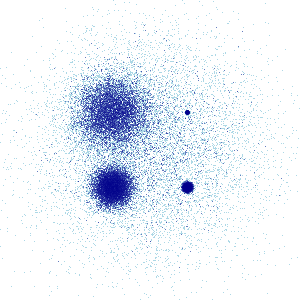

In [ ]:
# S'agrupen les dades en contenidors (que representen cada píxel de la imatge final)
# Exemple de reduction: count renderitza cada píxel d'un color diferent en funció
# del número d'observacions
# On hi ha més concentració es veu d'un color més fosc
tf.shade(canvas.points(df, 'x', 'y', agg=ds.count()))

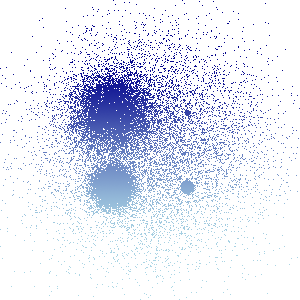

In [ ]:
# Exemple de reduction 2: mean renderitza cada pixel d'un color diferent en funció
# de la mitjana de tots los puntos en cada píxel per a un atribut, en aquest cas 'y'
# Les y més baixes (part inferior del gràfic) es veuen més clares
# y les més altes (part superior) més fosques
tf.shade(canvas.points(df, 'x', 'y', agg=ds.mean('y')))

### Transformation

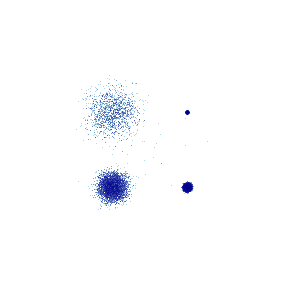

In [ ]:
# Representam només les dades que es trobin en un contenidor en el percentil 98
# Així eliminar el 2% de les dades que apareixen menys freqüentment
agg = canvas.points(df, 'x', 'y')
tf.shade(agg.where(agg>=np.percentile(agg,98)))

Ara aplicam una transormació que és el cosinus. Això té l'efecte d'invertir la imatge (més clar en punts més freqüents, més fosc en menys freqüents)

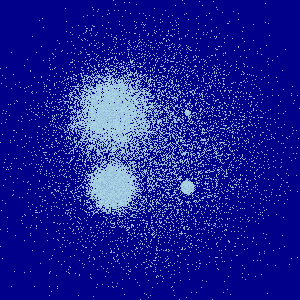

In [ ]:
tf.shade(np.cos(agg))

### Colormapping

Podem especificar un color

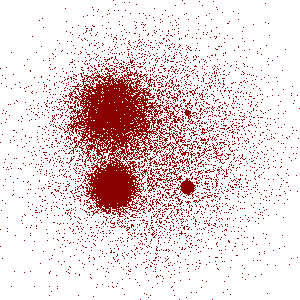

In [ ]:
agg = canvas.points(df, 'x', 'y')
tf.shade(agg,cmap=["darkred"])

O una gamma, en aquest cas del verd (poc freqüent) al vermell fosc (molt freqüent), passant pel taronja.

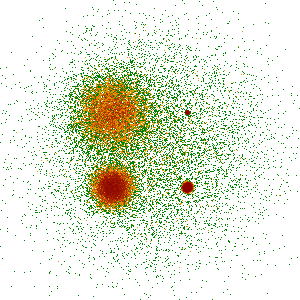

In [ ]:
tf.shade(agg,cmap=["green", "orange", "darkred"])

I ara veiem amb un color diferent cada una de les categories (d1 a d5).

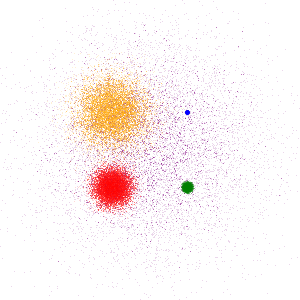

In [ ]:
aggc = canvas.points(df, 'x', 'y', ds.by('cat', ds.count()))

color_key = dict(d1='blue', d2='green', d3='red', d4='orange', d5='purple')
tf.shade(aggc, color_key=color_key)